In [5]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# create the Isochronal test class
class Isochronal:
    """
        Isochronal class that calculates the well deliveribility potential of a gas well \
        when given the required input parameters.

        Args:
             data (pandas dataframe) --> The Isochronal well test data
             Pr (float dtype) --> Reservoir Pressure, Psi of the well
             q_column (str dtype)--> flowrate column title in the data
             psd_column (str dtype) --> Pressure squared column title in the data
             Qstable (float dtype) --> stabilized flowrate, Mscf/d
             Pwfstable (float dtype) --> stabilized bottomhole flowing pressure, Psi
    """
    def __init__(self, data, Pr, q_column, psd_column, Qstable, Pwfstable):

        # initialize the input parameters
        self.data = data
        self.q_column = q_column
        self.psd_column = psd_column
        self.Qstable = Qstable
        self.Pwfstable = Pwfstable
        self.Pr = Pr

        # globalize slope and intercept
        global slope
        global intercept

        # calculate the slope and the intercept values
        slope = np.polyfit(np.log(self.data[q_column]), np.log(self.data[psd_column]), 1)[0]
        intercept = np.polyfit(np.log(self.data[q_column]), np.log(self.data[psd_column]), 1)[1]

    def n_factor(self):
        """
           Method that calculates the n-factor of the Isochronal test.

           Args:
               None

           Returns:
               float dtype: n-factor value
        """
        n = 1 / slope

        return round(n, 4)

    def c_factor(self):
        """
           Method that calculates the c-factor of the Isochronal test.

           Args:
               None

           Returns:
               float dtype: c-factor value
                """
        c = self.Qstable / (self.Pr ** 2 - self.Pwfstable ** 2) ** self.n_factor()

        return round(c, 4)

    def IPR(self):
        """
           Method outputs the Inflow Performance Relation of the Isochronal test.

           Args:
               None

           Returns:
               str dtype: IPR equation
        """
        return f"Qg = {self.c_factor()}(Pr^2 - Pwf^2)^{self.n_factor()}"

    def pressure_squared_graph(self):
        """
           Method displays the pressure squared against the flowrate

           Args:
               None

           Returns:
               image: a graphical representation
        """
        # set up the figure sizes
        plt.figure(figsize=(8, 6))
        plt.style.use('grayscale')

        # plot of the log-log graph
        plt.loglog(self.data[self.q_column], self.data[self.psd_column])

        # the scatter plot
        plt.scatter(self.data[self.q_column], self.data[self.psd_column], color='r')

        # define the labels for the graph
        plt.title("Isochronal Plot (Using Pressure Squared Approach)", fontweight='bold', fontsize=20)
        plt.xlabel('Qg, Mscf/d', fontweight='bold', fontsize=15)
        plt.ylabel('Pressure squared, psi^2', fontweight='bold', fontsize=15)
        plt.grid(visible=True)
        plt.show()

    def AOF(self):

        Qmax = self.c_factor() * ((self.Pr ** 2 - 14.73 ** 2) ** self.n_factor())

        return round(Qmax, 4)


In [6]:
import pandas as pd
df = pd.read_csv('test_data.csv')
df['psq'] = 1798 ** 2 - df['P'] ** 2
df.head()

,Period,Qg,P,psq
0,1,1800,1768,106980
1,2,3000,1747,180795
2,3,6200,1682,403680


In [7]:
# from IsochronalTest import Isochronal

iso = Isochronal(df, 1798, 'Qg', 'psq', 6300, 1600)
print(f"n = {iso.n_factor()}")
print(f"c = {iso.c_factor()}")
print(f"IPR equation is: {iso.IPR()}")
print(f"AOF = {iso.AOF()}Mscf/d", )

n = 0.9294
c = 0.0241
IPR equation is: Qg = 0.0241(Pr^2 - Pwf^2)^0.9294
AOF = 27039.1492Mscf/d


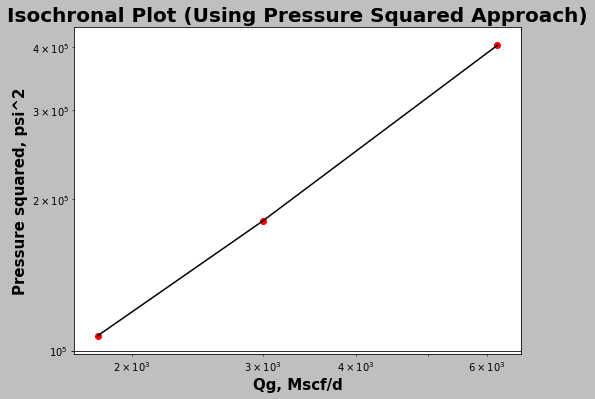

In [8]:
iso.pressure_squared_graph()